In [1]:
import cv2
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [11]:
def extract_shape_features(image):
    kernel_size = 7
    transform_iteration = 8

    # Define the kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    image_dict = {}
    image_dict["eroded_image"] = cv2.erode(image, kernel, iterations=transform_iteration)
    image_dict["dilated_image"] = cv2.dilate(image, kernel, iterations=transform_iteration)
    image_dict["opened_image"] = cv2.dilate(image_dict['eroded_image'], kernel, iterations=transform_iteration)
    image_dict["closed_image"] = cv2.erode(image_dict['dilated_image'], kernel, iterations=transform_iteration)

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plot_count = 2
    for title, img in image_dict.items():
        plt.subplot(2, 3, plot_count)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plot_count += 1

    plt.show()

Real Image


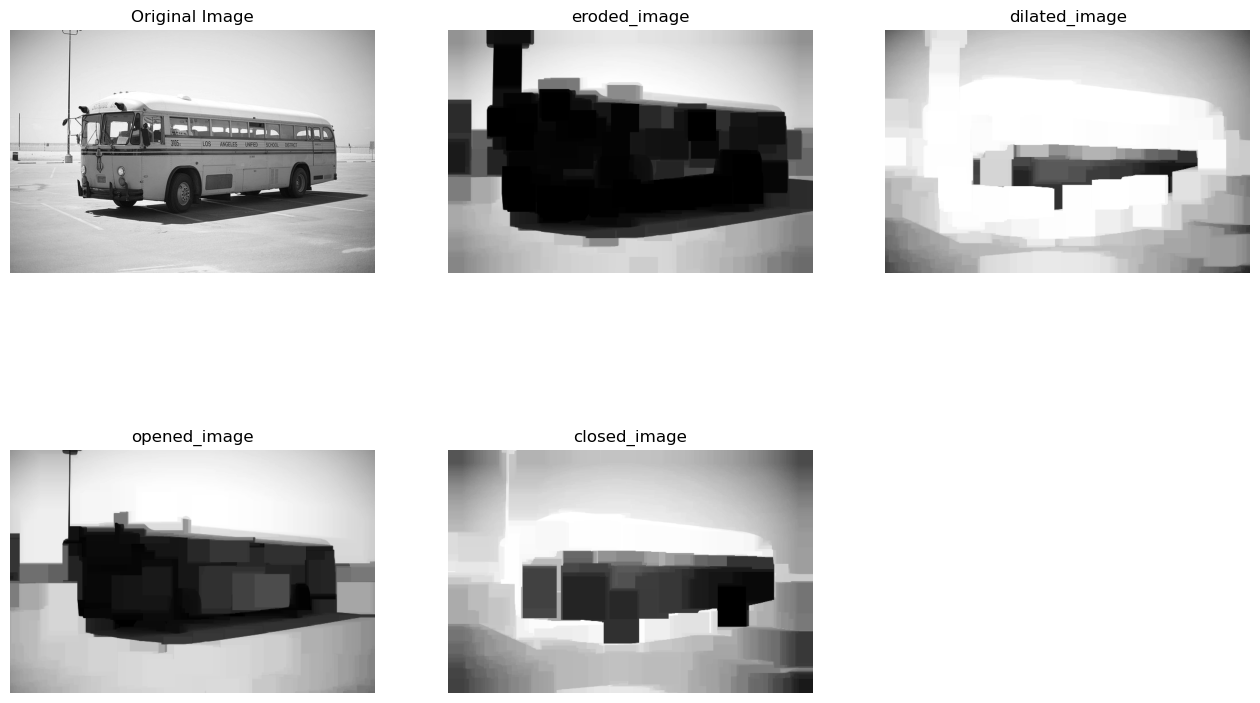

AI Generated Image


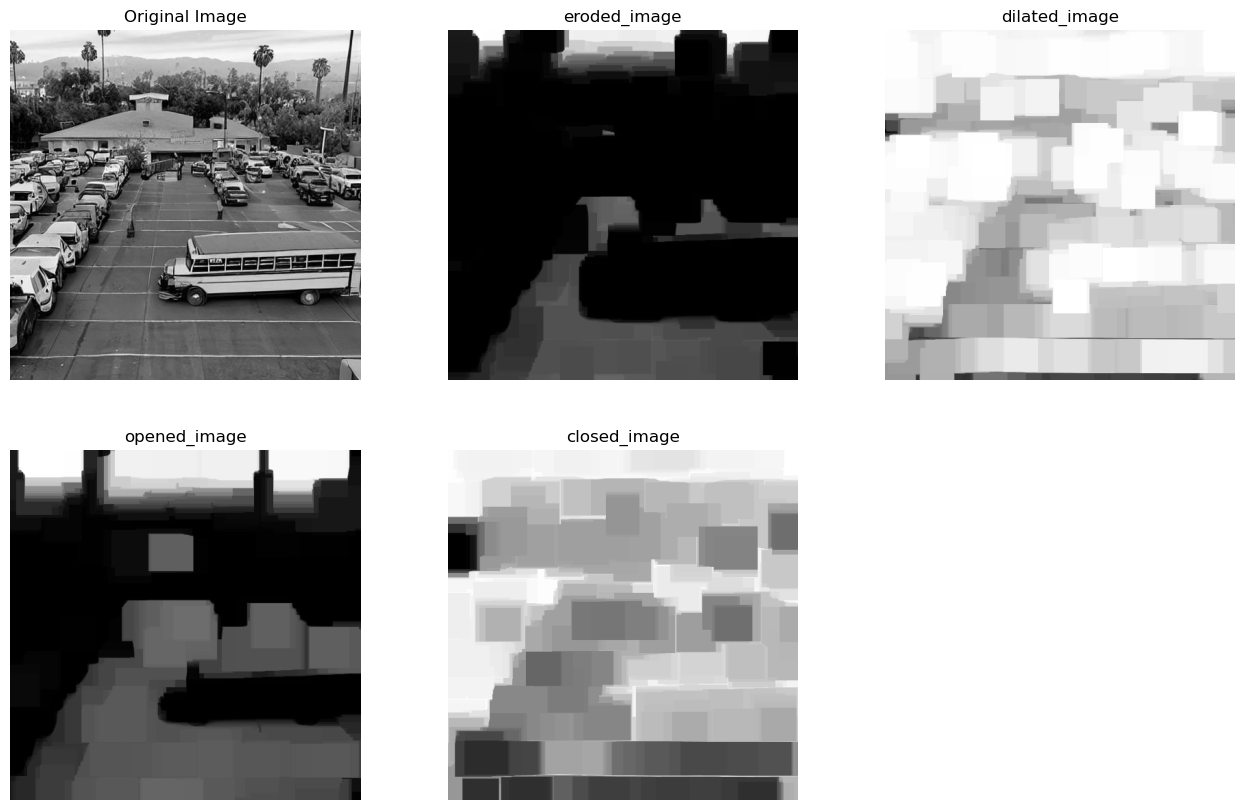

In [12]:

img_path = os.getcwd() + r'\AIGC-Detection-Dataset\train\0_real\000000000471.jpg'

# Real Image
print("Real Image")
image = io.imread(img_path, as_gray=True)
extract_shape_features(image)

# AI Generated Image
print("AI Generated Image")
image = io.imread(img_path.replace("0_real", "1_fake"), as_gray=True)
extract_shape_features(image)

